In [1]:
%matplotlib inline
from fitbittools.fbdata import FitBitData                                              
from fitbittools.manipulators import Manipulator
from sklearn import linear_model
from numpy.polynomial.polynomial import polyval
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename="/Users/frenchwr/Computing/Python/Fitbit/data/fitbit_export_20140710.csv"
fb_obj = FitBitData(filename)
manip = Manipulator()
x = manip.convert_to_matrix(fb_obj.sleep.awake)
y = manip.convert_to_matrix(fb_obj.sleep.asleep)
test_frac = 0.25
[x_train,y_train,x_test,y_test,x_train_poly,x_test_poly] = \
                     manip.split_rand(x,y,test_frac,Poly=True)

Training set size:  36
Test size:  11
Test data makes up:  23.4042553191  % of all data


In [3]:
clf = linear_model.LinearRegression(fit_intercept=False)
clf.fit(x_train_poly, y_train)

# The coefficients
print "Coefficients: \n", clf.coef_[0]
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((clf.predict(x_test_poly) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % clf.score(x_test_poly, y_test))

Coefficients: 
[  4.05152756e+02   6.75930447e+00  -1.44873225e-01]
Residual sum of squares: 678.16
Variance score: 0.21


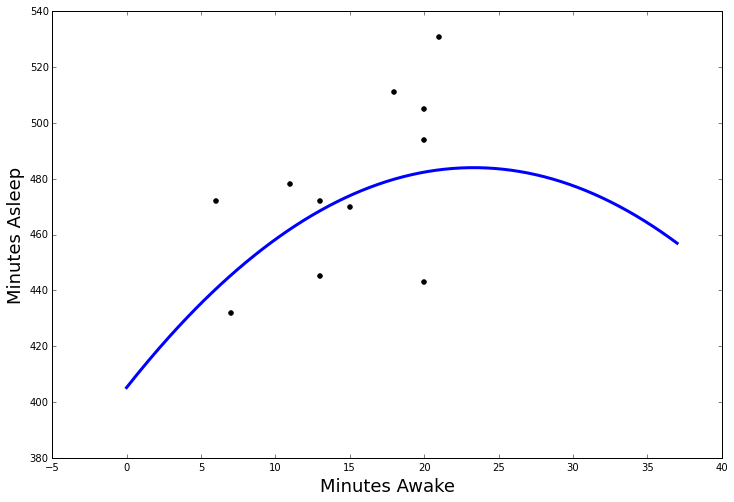

In [11]:
# Plot outputs
plt.figure(figsize=(12,8))
plt.scatter(x_test, y_test,  color='black')
x_regular = np.linspace(x_train.min(),x_train.max(),200)
y_regular_poly = polyval(x_regular, clf.coef_[0])
plt.plot(x_regular, y_regular_poly, color='blue',linewidth=3)
plt.xlabel("Minutes Awake",fontsize=18)
plt.ylabel("Minutes Asleep",fontsize=18)
plt.show()